Lo scopo dell'esercizio è quello di risolvere il problema del commesso viaggiatore (TSP). Questo consiste nel trovare l'itinerario che permette di visitare una sola volta delle città, il cui numero e la cui posizione sono fissati, e di tornare al punto di partenza viaggiando la minore distanza possibile.  
Nella nostra simulazione abbiamo considerato $N=34$ città. Sono state considerate 2 casistiche, quella in cui queste città si trovano sul bordo di una circonferenza di raggio R e quella in cui si trovino all'interno di una zona quadrata di lato L.  Le città sono state selezionate randomicamente usando una estrazione uniforme all'interno del dominio specificato.  
Questo viene fatto all'interno di: "genera.cpp" che può essere compilato con il comando: "make generate" (è necessario spostare il file dalla cartella "OUTPUT" alla cartella "INPUT", cambiare l'estensione da: ".dat" a: ".in" e cancellare la prima riga se si vogliono usare le configurazioni per il TSP).  
Si tenta di risolvere il problema del commesso viaggiatore tramite il file: "simulator.cpp", che può essere compilato con il comando: "make simulate".  

In entrambe le configurazioni sono state minimizzate le seguenti metriche:  
$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
\\
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$
Nelle simulazioni le distanze sono misurate nelle seguenti unità naturali:
$$
x^* = 
\begin{cases} 
\frac{x}{R} & \text{se le città sono sulla circonferenza}  \\
\frac{x}{L} & \text{se le città sono nel quadrato}  \\
\end{cases}
$$


Ad ogni città è stato assegnato un numero da $1$ a $N$ in ordine crescente di estrazione. 
La città iniziale è stata fissata ad essere quella con numero 1.  In questo modo ogni traiettoria ha degenerazione $2$ dovuta al verso di percorrenza.

La mia popolazione sarà quindi composta da $M$ individui. Ognuno di questi è un percorso decodificato da un vettore di interi diversi fra loro e il cui primo elemento è 1 (la popolazione è quindi un vettore di vettori).  L'ordine in cui i numeri appaiono nel vettore rappresenta infatti l'ordine in cui le città corrispondenti a quei numeri sono visitate.  


La prima generazione viene creata partendo da una popolazione in cui ogni individuo è rappresentato da numeri in ordine crescente. Per ogni individuo vengono scambiati due alleli del suo genoma, estratti casualmente, per un numero di volte pari a $10\cdot M$.  
La popolazionè verrà poi ordinata in modo che gli individui con indici più bassi abbiano percorsi più brevi.  
Per valutare queste metriche ho usato una matrice $\{ \mathbb{M}\}_{i,j}$ tale che $ \mathbb{M}_{i j}=\mathbb{M}_{j i}=d(\vec{c}_i, \vec{c}_j)$ dove: $\{ i,j \}\in \{1, ..., N \}$, $\vec{c}_i$ è la posizione della città associata all'intero $i$ e $d$ è la funzione di distanza tra due città associata alla metrica considerata.  
Per produrre una nuova generazione sono scelte $\frac{N}{2}$ coppie di individui (con possibili ripetizioni dello stesso individuo in coppie diverse). Ogni individuo è selezionato tramite l'indice corrispondente nel vettore che rappresenta la popolazione usando il valore: $j= \lfloor{M \times r^p} \rfloor$ dove $r$ è estratta uniformemente in $[0,1)$ e $p$ è stato fissato a 2.  
Questo esponente, essendo maggiore di 1, predilige la selezione degli individui corrispondenti ad indici bassi all'interno della popolazione, ossia quei percorsi che prevedono una minor distanza di viaggio.
Per ognuna di queste coppie si tenta di applicare l'algoritmo di crossing, descritto nella consegna, con probabilità $P_c$ (dato come input al programma).  
A ogni membro della nuova popolazione così generata, si tentano di applicare tutte le mutazioni inserite nel codice con probabilità (per ogni mutazione) $P_m$. Anche questa probabilità è data come input al programma.  
Le mutazioni inserite nel codice sono tutte quelle citate nella consegna.  
La nuova popolazione prende poi il posto della precedente generazione.

Il ciclo viene poi ripetuto in modo da generare $n_{gen}$ generazioni, dove $n_{gen}$ è dato in input al programma.

Sono stati provati diversi valori per i parametri da fornire in input fino ad arrivare a risultati soddisfacenti.

# 9.0.1

## salvataggio dati

In [82]:
best_ev=[]# evoluzione della migliore distranza
av_ev=[]# evoluzione della media tra la metà migliore
gen=[] # vettore con le generazioni

metrica=["L1", "L2"]
shape=["circumference", "square"]
# ognuna di queste proprietà sara in una lista che divide le due forme e ognuna di queste in una lista che divide le due metriche

for i in range(len(metrica)):
	best_ev_fixed_metric=[]
	av_fixed_metric=[]
	gen_fixed_metric=[]
	for j in range(len(shape)):
		with open(f"./OUTPUT/{metrica[i]}/{shape[j]}/evolution.out", 'r') as file:
			best_ev_fixed_shape=[]
			av_fixed_shape=[]
			gen_fixed_shape=[]
			righe=file.read().split("\n")
			# print(righe)
			for l in righe:
				# print(l.split())
				if(l!=""):
					try:
						a,b,c=l.split()
						gen_fixed_shape.append(int(a))
						best_ev_fixed_shape.append(float(b))
						av_fixed_shape.append(float(c))	
					except ValueError:
						print(f"Il valore '{l}' non può essere convertito in float.")


			best_ev_fixed_metric.append(best_ev_fixed_shape)
			av_fixed_metric.append(av_fixed_shape)
			gen_fixed_metric.append(gen_fixed_shape)

	best_ev.append(best_ev_fixed_metric)
	av_ev.append(av_fixed_metric)
	gen.append(gen_fixed_metric)

# print(gen_fixed_metric)

Il valore '    #generation:          shortest_distance:          average_of_top_200:' non può essere convertito in float.
Il valore '    #generation:          shortest_distance:          average_of_top_200:' non può essere convertito in float.
Il valore '    #generation:          shortest_distance:          average_of_top_200:' non può essere convertito in float.
Il valore '    #generation:          shortest_distance:          average_of_top_300:' non può essere convertito in float.


## grafici

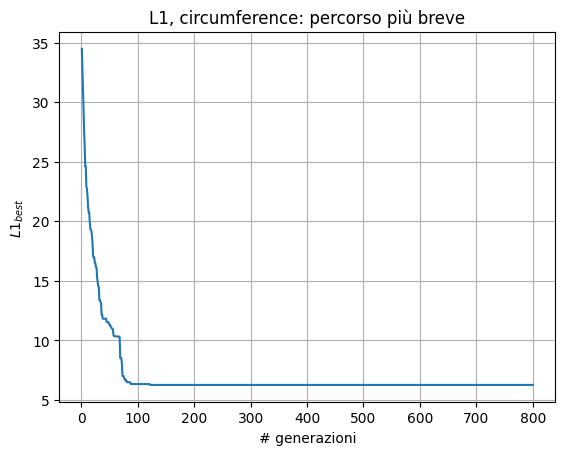

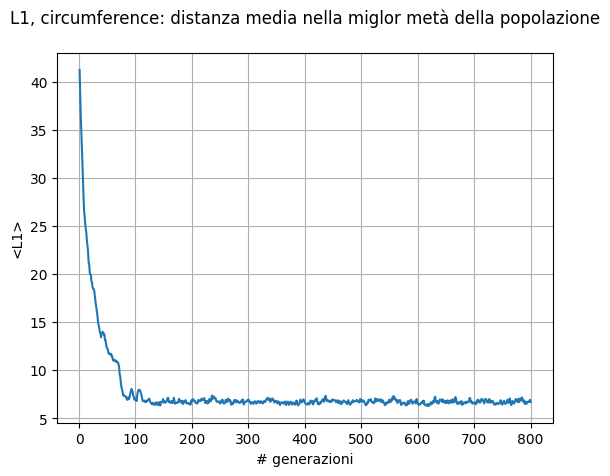

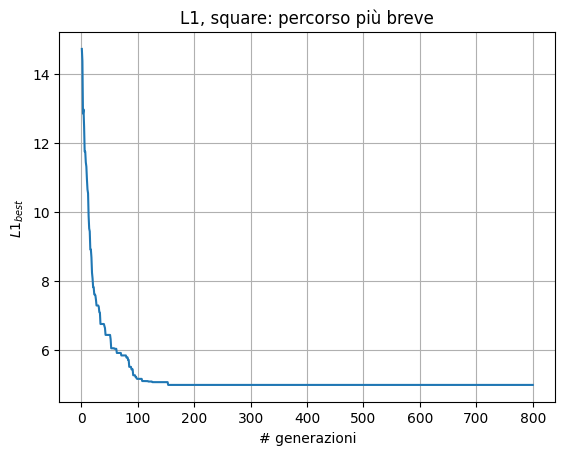

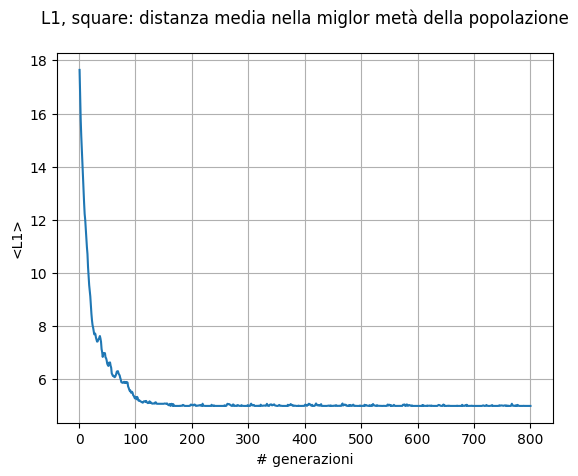

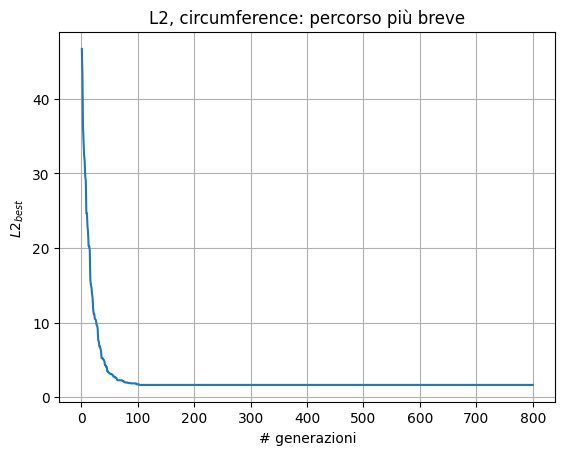

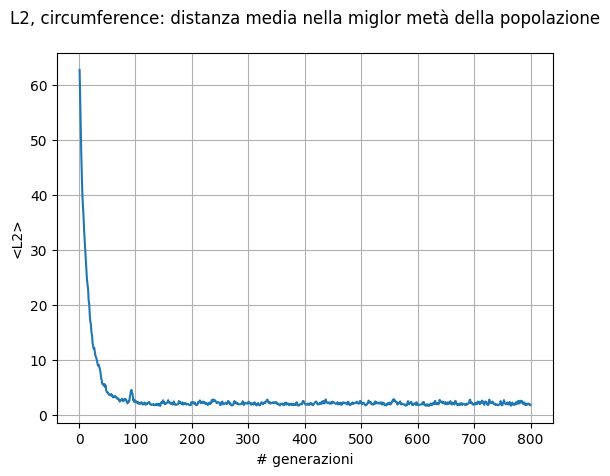

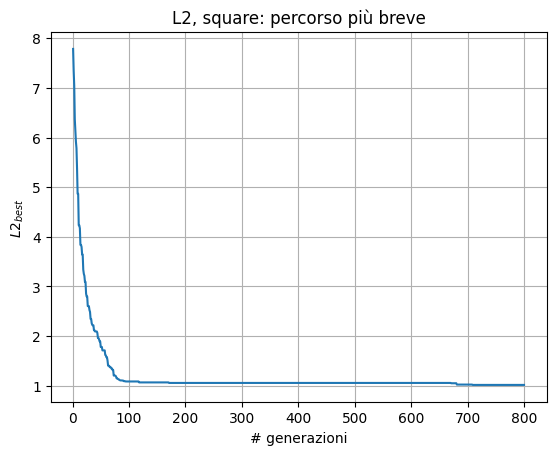

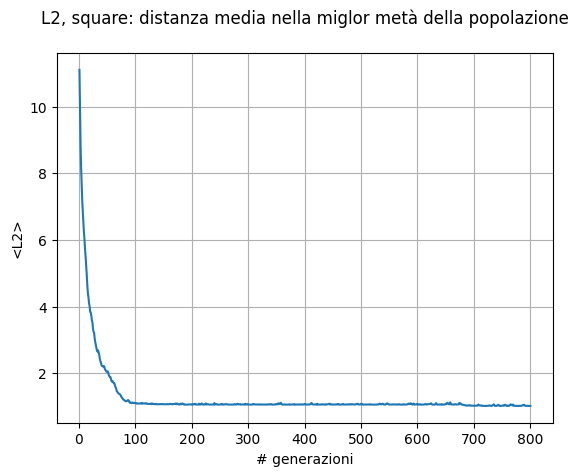

In [83]:
# da eseguire dopo il salvataggio dati

import matplotlib.pyplot as plt
import numpy as np

for i in range(len(metrica)):
	for j in range(len(shape)):
		plt.plot(gen[i][j], best_ev[i][j])	
		plt.title(f"{metrica[i]}, {shape[j]}: percorso più breve")
		plt.xlabel("# generazioni")
		plt.ylabel("$"+metrica[i]+r"_{best}$")
		plt.grid(True)
		plt.show()
		plt.plot(gen[i][j], av_ev[i][j])	
		plt.title(f"{metrica[i]}, {shape[j]}: distanza media nella miglor metà della popolazione\n")
		plt.xlabel("# generazioni")
		plt.ylabel(f"<{metrica[i]}>")
		plt.grid(True)
		plt.show()


Come ci aspettiamo la "loss function" diminuisce con l'aumento delle generazione e i geni associati ai "buoni" percorsi si diffondono velocemente. 

# 9.0.2

In [84]:
# creo il vettore che mi trasforma gli interi nelle posizioni delle città (l'elemento i contiene le cordinate della città  con numero i+1)


circumference_tr=[]

with open("./INPUT/circumference.in") as file:
	righe=file.read().split("\n")
	for l in righe:
		if(l!=""):
			try:
				# print(l.split("\t"))
				a,b,c=l.split() #split() separa se ho cose tra 1 o più spazi vuoti
				# print(i)
				posit=[] # posizione

				posit.append(float(b))
				posit.append(float(c))
				circumference_tr.append(posit)
			except ValueError:
				print(f"Il valore '{l}' non può essere convertito in float.")


square_tr=[]

with open("./INPUT/square.in") as file:
	righe=file.read().split("\n")
	for l in righe:
		if(l!=""):
			try:
				# print(l.split("\t"))
				a,b,c=l.split() #split() separa se ho cose tra 1 o più spazi vuoti
				# print(i)
				posit=[] # posizione

				posit.append(float(b))
				posit.append(float(c))
				square_tr.append(posit)
			except ValueError:
				print(f"Il valore '{l}' non può essere convertito in float.")


tr=[]
tr.append(circumference_tr)
tr.append(square_tr)

In [85]:
# non necessario eseguirlo a meno che si vogliano fare dei test

def d2(pA,pB):
	dist=0
	for i in range(len(pA)):
		dist+=(pA[i]-pB[i])**2
	return dist

def d1(pA,pB):
	dist=0
	for i in range(len(pA)):
		dist+=(pA[i]-pB[i])**2
	return (dist)**0.5

def L1(person,k): #individo, intero corrispondente alla forma
	L=0.
	for i in range(len(person)-1):
		L+=d1(tr[k][person[i]],tr[k][person[i+1]])
	L+=d1(tr[k][person[0]],tr[k][person[len(person)-1]])
	return L

def L2(person,k): #individo, intero corrispondente alla forma
	L=0.
	for i in range(len(person)-1):
		L+=d2(tr[k][person[i]], tr[k][person[i+1]])
	L+=d2(tr[k][person[0]],tr[k][person[len(person)-1]])
	return L


## salvataggio dati

In [86]:
# immagazzino i dati

#da eseguire dopo aver eseguito il blocco precedente

# dal più esterno al più interno:
# metrica
# forma


metrica=["L1", "L2"]
shape=["circumference", "square"]
# ognuna di queste proprietà sara in una lista che divide le due forme e ognuna di queste in una lista che divide le due metriche 

best=[] # al variare della metrica e dello shape mi dice le cordinate del miglior individuo
for i in range(len(metrica)):
	best_fixed_metric=[]
	for j in range(len(shape)):
		with open(f"./OUTPUT/{metrica[i]}/{shape[j]}/best_travel.out", 'r') as file:
			indiv=[]
			numbers=file.read().split(" ")
			for k in numbers:
				if(k!="\n"):
					indiv.append(tr[j][int(k) - 1])
			best_fixed_metric.append(indiv)
	best.append(best_fixed_metric)

## grafici

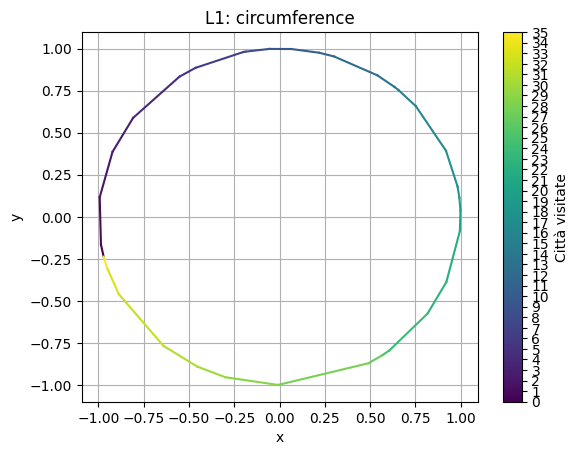

aimed_loss_function(L1): 6.261429
L1: 6.261428711860283
L2: 1.6356148487340854


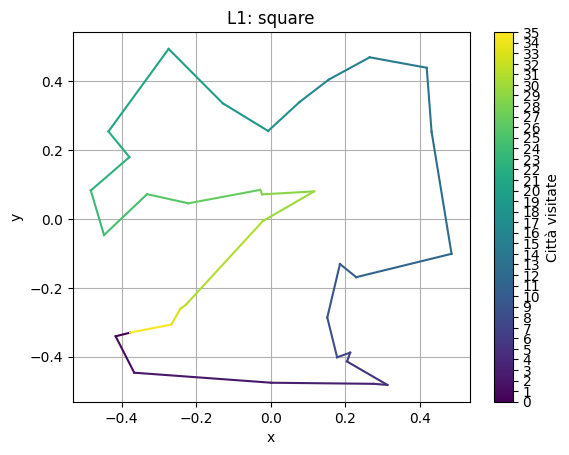

aimed_loss_function(L1): 4.996578
L1: 4.996577896148301
L2: 1.0290742443695282


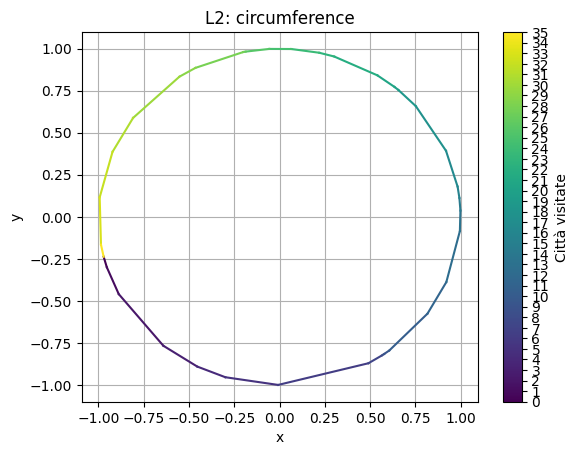

aimed_loss_function(L2): 1.635615
L1: 6.261428711860284
L2: 1.6356148487340854


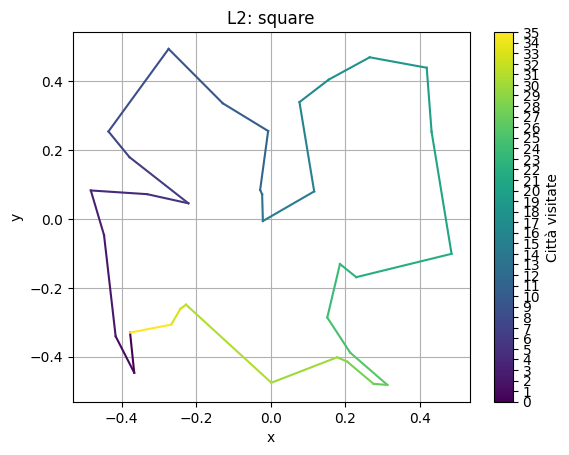

aimed_loss_function(L2): 1.017541
L1: 5.1001779906500575
L2: 1.0175408789814235


In [87]:
# da eseguire dopo il blocco precedente

import matplotlib.pyplot as plt
import numpy as np



for i in range(len(metrica)):
	for j in range(len(shape)):
		x, y = zip(*best[i][j])

		# Creazione di un array che rappresenta la progressione dei punti
		progress = np.linspace(0, 1, len(best[i][j]) + 1)

		# Creazione della colormap
		cmap = plt.get_cmap('viridis')

		# Colori basati sulla progressione dei punti
		colors = cmap(progress)

		fig, ax = plt.subplots()

		# Disegna la traiettoria con un gradiente di colore
		for k in range(len(best[i][j]) - 1):
			plt.plot(x[k:k+2], y[k:k+2], color=colors[k]) # prese coppie di elementi

		plt.plot([x[-1], x[0]], [y[-1], y[0]], color=colors[len(best[i][j])])

		# Disegna la barra di colori
		norm_cl = plt.Normalize(0, len(best[i][j]) + 1) # stabilito range di colori
		cb = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm_cl), ax=ax)  # barra di colori
		cb.set_label('Città visitate')
		cb.set_ticks(np.linspace(0, len(best[i][j]) + 1, len(best[i][j]) + 2)) # Impostati solo 5 tick per la barra di colori


		# Aggiungi un titolo e le etichette agli assi
		ax.set_title(f"{metrica[i]}: {shape[j]}")
		ax.set_xlabel('x')
		ax.set_ylabel('y')

		# Mostra la griglia
		ax.grid(True)

		# Visualizza la traiettoria
		plt.show()
		

		with open(f"./OUTPUT/{metrica[i]}/{shape[j]}/best_travel.out", 'r') as file:
			indiv=[]
			numbers=file.read().split(" ")

			for k in numbers:
				if(k!="\n"):
					indiv.append(int(k) - 1)
					# print(indiv)
			print(f"aimed_loss_function({metrica[i]}): {best_ev[i][j][len(best_ev[i][j])-1]}")
			print(f"L1: {L1(indiv,j)}")
			print(f"L2: {L2(indiv,j)}")

				
			
				

# print(best)

Si può notare guardando i viaggi associati alla disposizione sulla circonferenza che i viaggi hanno degenerazione 2, infatti le due metriche hanno trovato lo stesso miglior percorso ma usando percorrenze nel senso opposto.  
Il fatto che la distanza sia calcolata correttamente si può intuire dal fatto che la distanza dei percorsi graficati nel caso di disposizioni circolari per la metrica $L^{(1)}$ sia in buona approssimazione: $L^{(1)}_{best}=2 \pi$ (ossia il perimetro di una circonferenza di raggio unitario).  

Per i percorsi relativi alla disposizione all'interno del quadrato si nota invece che le due metriche sono arrivate a due percorsi diversi. Questo non sembra però essere un indicatore del fatto che l'algoritmo non sia giunto a un minimo, infatti entrambe le metriche, se valutate sul percorso trovato usando la loss-function dell'altra metrica, risultano maggiori.